In [1382]:
import env as env
from agent import agent
import utils
from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np
from IPython.display import HTML
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import LogNorm

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Environment

In [1383]:
environment = env.env()

Environment Ready.


In [1384]:
environment.probability_matrix

array([[1. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0. , 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5, 0. , 0. ,
        0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5, 0.5, 0.5,
        0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0.5,
        1. ]])

In [1385]:
environment.probability_matrix_df

0          1          2          3          4          5          6      
  left right left right left right left right left right left right left right
0  1.0   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
1  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
2  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0
3  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0
4  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0
5  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0
6  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   1.0

In [1386]:
left_columns = [col for col in environment.probability_matrix_df.columns if 'left' in col]
environment.probability_matrix_df[left_columns]

,0,1,2,3,4,5,6
,left,left,left,left,left,left,left
0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [1387]:
environment.rewards_df 

,left,right
0,10.0,10.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,10.0,10.0


## Policy

We define a random starting policy.

In [1388]:
policy = {}
for state in environment.states:
    for action in state.actions:
        policy[(state.number, action.name)] = 1/len(state.actions)

In [1389]:
#always right policy
policy = {}
for state in environment.states:
    for action in state.actions:
        if action.name == 'left':
            policy[(state.number, action.name)] = 1
        else:
            policy[(state.number, action.name)] = 0

In [1390]:
agent = agent(policy,environment)

In [1391]:
agent.policy

{(0, 'left'): 1,
 (0, 'right'): 0,
 (1, 'left'): 1,
 (1, 'right'): 0,
 (2, 'left'): 1,
 (2, 'right'): 0,
 (3, 'left'): 1,
 (3, 'right'): 0,
 (4, 'left'): 1,
 (4, 'right'): 0,
 (5, 'left'): 1,
 (5, 'right'): 0,
 (6, 'left'): 1,
 (6, 'right'): 0}

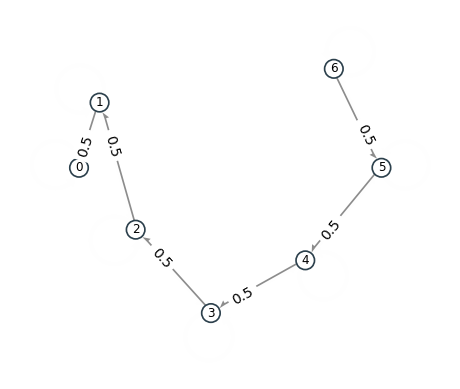

In [1392]:
utils.visualize_policy(environment, agent)

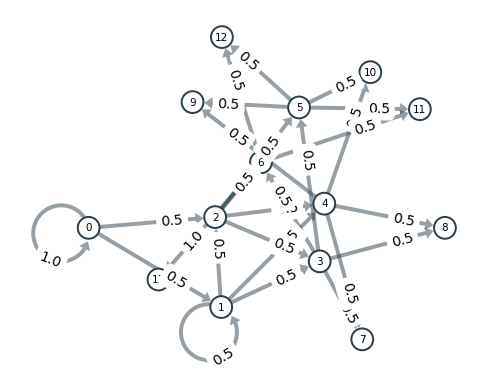

In [1393]:
utils.visualize_environment(environment)

### MDP + Policy

Power Iteration

$V_k(s) = (R^\pi + \gamma P^\pi) V_{k-1}$

where 

$ R^\pi(s) = \sum_{a \in A} \pi (a \lvert s)R(s,a)$


and

$ P^\pi(s' \lvert s) = \sum_{a \in A} \pi(a \lvert s)P(s' \lvert s,a) $

In [1394]:
r_pi = [0 for i in range(len(environment.states))]

for state in environment.states:
    for action in state.actions:
        r_pi[state.number] += agent.policy[(state.number, action.name)] * environment.rewards_df.loc[state.number, action.name]

In [1395]:
r_pi

[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]

$ P^\pi(s' \lvert s) = \sum_{a \in A} \pi(a \lvert s)P(s' \lvert s,a) $

In [1396]:
environment.probability_matrix_df

0          1          2          3          4          5          6      
  left right left right left right left right left right left right left right
0  1.0   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
1  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
2  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0
3  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0
4  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0
5  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0
6  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   1.0

In [1397]:
p_pi = np.zeros( ( len(environment.states), len(environment.states) ) )

for state in environment.states:
    for action in state.actions:
        for state_key,state_value in action.function(state).items():
            p_pi[state_key.number, state.number] += agent.policy[(state.number, action.name)] * state_value

In [1398]:
utils.p_df(p_pi)

,0,1,2,3,4,5,6
0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.5


Computation

$\forall s \in S$


$V^\pi_k(s) = R(s,\pi (s)) + \gamma \sum_{s' \in S} P^\pi (s' \lvert s, \pi(s)) V^\pi_{k-1}(s)$


In [1399]:
epsilon = agent.EPSILON

In [1400]:
v_pi = {}
v_pi[0] = r_pi
gamma = environment.DISCOUNT_FACTOR
v_pi[0]

[10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0]

In [1401]:
gamma

0.5

In [1402]:
agent.policy

{(0, 'left'): 1,
 (0, 'right'): 0,
 (1, 'left'): 1,
 (1, 'right'): 0,
 (2, 'left'): 1,
 (2, 'right'): 0,
 (3, 'left'): 1,
 (3, 'right'): 0,
 (4, 'left'): 1,
 (4, 'right'): 0,
 (5, 'left'): 1,
 (5, 'right'): 0,
 (6, 'left'): 1,
 (6, 'right'): 0}

In [1403]:
pol = {}
for k,v in agent.policy.items():
    if v != 0:
        pol[k[0]] = k[1]

pol

{0: 'left', 1: 'left', 2: 'left', 3: 'left', 4: 'left', 5: 'left', 6: 'left'}

In [1404]:
environment.probability_matrix_df

0          1          2          3          4          5          6      
  left right left right left right left right left right left right left right
0  1.0   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
1  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0
2  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0  0.0   0.0
3  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0  0.0   0.0
4  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0  0.0   0.0
5  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   0.5  0.5   0.0
6  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.0  0.0   0.5  0.5   1.0

In [1405]:
environment.rewards_df

,left,right
0,10.0,10.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,10.0,10.0


$\forall s \in S$


$V^\pi_k(s) = R(s,\pi (s)) + \gamma \sum_{s' \in S} P^\pi (s' \lvert s, \pi(s)) V^\pi_{k-1}(s')$


In [1406]:
v_pi[1] = []
for state in environment.states:
    v_pi[1].append(0)
    summ = sum([  environment.probability_matrix_df.loc[s_prime.number, (state.number, pol[state.number])] * v_pi[0][s_prime.number] for s_prime in environment.states  ])
    v_pi[1][state.number] = environment.rewards_df.loc[state.number, pol[state.number]] + gamma * summ

In [1407]:
v_pi[1]

[15.0, 2.5, 0.0, 0.0, 0.0, 0.0, 12.5]

In [1408]:
for i in range(2,100):
    v_pi[i] = []
    for state in environment.states:
        v_pi[i].append(0)
        summ = sum([  environment.probability_matrix_df.loc[s_prime.number, (state.number, pol[state.number])] * v_pi[i-1][s_prime.number] for s_prime in environment.states  ])
        v_pi[i][state.number] = environment.rewards_df.loc[state.number, pol[state.number]] + gamma * summ

In [1409]:
v_pi[i]

[20.0,
 6.666666666666666,
 2.222222222222222,
 0.7407407407407406,
 0.2469135802469135,
 0.08230452674897117,
 13.36076817558299]

In [1410]:
agent.policy_evaluation

[20.0,
 6.666666666666666,
 2.222222222222222,
 0.7407407407407406,
 0.2469135802469135,
 0.08230452674897117,
 13.36076817558299]

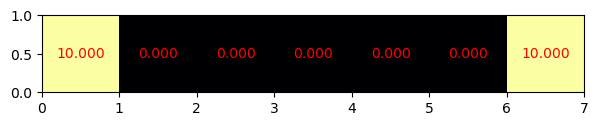

In [1411]:
fig, ax = plt.subplots(figsize=(7,1))

def update(frame):
    cmap = plt.get_cmap('inferno')
    ax.clear()
    result = v_pi[frame]

    for i, value in enumerate(result):
        plt.text(i + 0.5, 0.5, f'{value:.3f}', color='red', ha='center', va='center')

    ax.imshow(np.array(result).reshape(1, -1), cmap=cmap, aspect='auto', extent=[0, len(result), 0, 1])

ani = FuncAnimation(fig, update, frames=len(v_pi), interval=500, repeat=False)

HTML(ani.to_jshtml())

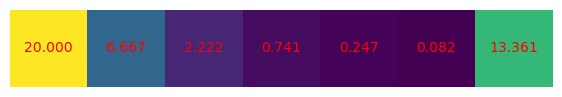

In [1412]:
utils.plot_heatmap(v_pi[i])

From the slides: What if our policy is to ALWAYS go right?

## Policy Iteration

Q-Value of a policy:

$ Q^\pi(s,a) = R(s,a) + \gamma \sum_{s' \in S} P(s' \lvert s,a) V^\pi(s') $


In [1413]:
def q(state, action, agent):
    if action in state.actions:
        p = environment.probability_matrix_df[(state.number,action.name)].to_list()

        return environment.rewards_df.loc[state.number, action.name] + environment.DISCOUNT_FACTOR * sum([  p[next_state.number] * agent.policy_evaluation[next_state.number] for next_state in environment.states])

In [1414]:
p

array([[0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0.5, 0.5, 0. , 0. , 0. ],
       [0. , 0. , 0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.5, 0.5, 0. ],
       [0. , 0. , 0. , 0. , 0. , 0.5, 1. ]])

In [1415]:
utils.p_df(p_pi)

,0,1,2,3,4,5,6
0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.5


In [1416]:
q(environment.states[0], environment.states[0].actions[0], agent)

20.0

In [1417]:
q(environment.states[6], environment.states[6].actions[1], agent)

16.680384087791495

Policy Iteration step

In [1418]:
qs = {}
for state in environment.states:
    for action in state.actions:
        qs[(state.number, action.name)] = q(state, action, agent)

In [1419]:
maxs = {}
for state in environment.states:
    maxs[state] = state.actions[0]
    for action in state.actions:
        if qs[(state.number, action.name)] > qs[(state.number, maxs[state].name)]:
            maxs[state] = action

In [1420]:
new_policy = {}
for state in environment.states:
    for action in state.actions:
        if action == maxs[state]:
            new_policy[(state.number, action.name)] = 1
        else:
            new_policy[(state.number, action.name)] = 0

In [1421]:
new_policy

{(0, 'left'): 1,
 (0, 'right'): 0,
 (1, 'left'): 1,
 (1, 'right'): 0,
 (2, 'left'): 1,
 (2, 'right'): 0,
 (3, 'left'): 1,
 (3, 'right'): 0,
 (4, 'left'): 1,
 (4, 'right'): 0,
 (5, 'left'): 0,
 (5, 'right'): 1,
 (6, 'left'): 0,
 (6, 'right'): 1}

## Policy iteration loop

In [1422]:
def q(state, action, agent):
    if action in state.actions:
        p = environment.probability_matrix_df[(state.number,action.name)].to_list()

        return environment.rewards_df.loc[state.number, action.name] + environment.DISCOUNT_FACTOR * sum([  p[next_state.number] * agent.policy_evaluation[next_state.number] for next_state in environment.states])

In [1423]:
utils.p_df(p_pi)

,0,1,2,3,4,5,6
0,1.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.5,0.5,0.0,0.0,0.0,0.0
2,0.0,0.0,0.5,0.5,0.0,0.0,0.0
3,0.0,0.0,0.0,0.5,0.5,0.0,0.0
4,0.0,0.0,0.0,0.0,0.5,0.5,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.5
6,0.0,0.0,0.0,0.0,0.0,0.0,0.5


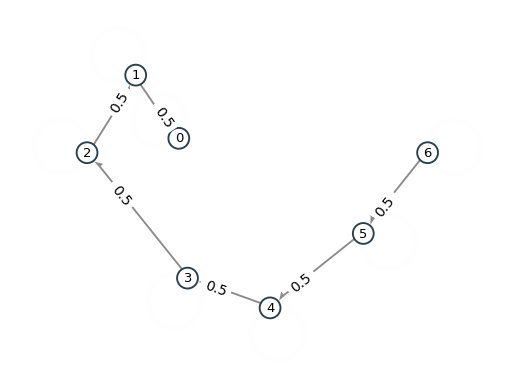

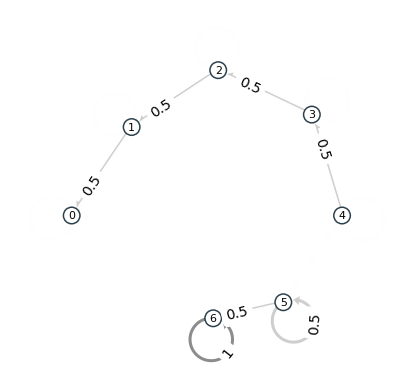

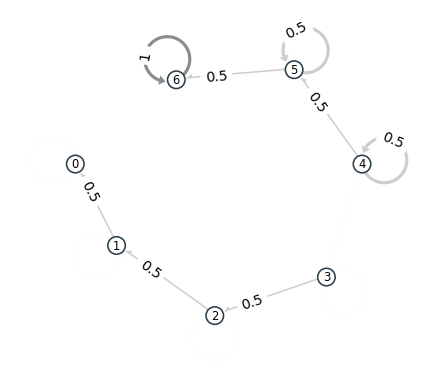

In [1424]:
policies = [ None, agent.policy ]
old_policy = agent.policy
new_policy = {}
while policies[-2] != new_policy:
    utils.visualize_policy(environment, agent)

    qs = {}
    for state in environment.states:
        for action in state.actions:
            qs[(state.number, action.name)] = q(state, action, agent)

    maxs = {}
    for state in environment.states:
        maxs[state] = state.actions[0]
        for action in state.actions:
            if qs[(state.number, action.name)] > qs[(state.number, maxs[state].name)]:
                maxs[state] = action    

    new_policy = {}
    for state in environment.states:
        for action in state.actions:
            if action == maxs[state]:
                new_policy[(state.number, action.name)] = 1
            else:
                new_policy[(state.number, action.name)] = 0

    
    policies.append(new_policy)
    agent.change_policy(new_policy)

In [1425]:
agent.policy

{(0, 'left'): 1,
 (0, 'right'): 0,
 (1, 'left'): 1,
 (1, 'right'): 0,
 (2, 'left'): 1,
 (2, 'right'): 0,
 (3, 'left'): 1,
 (3, 'right'): 0,
 (4, 'left'): 0,
 (4, 'right'): 1,
 (5, 'left'): 0,
 (5, 'right'): 1,
 (6, 'left'): 0,
 (6, 'right'): 1}